In [34]:
import gc

In [35]:
from fastai.vision import ImageDataBunch,ImageList,get_transforms,models,cnn_learner,accuracy

In [36]:
path ='/home/qnkhuat/data/emotion_compilation_split'

In [37]:
tfms = get_transforms(do_flip=True,flip_vert=False)

In [38]:
# ran this get erro in THcroe
data = (ImageDataBunch.from_folder(path,test='test',size=48,ds_tfms=tfms,bs=64)
       .normalize())

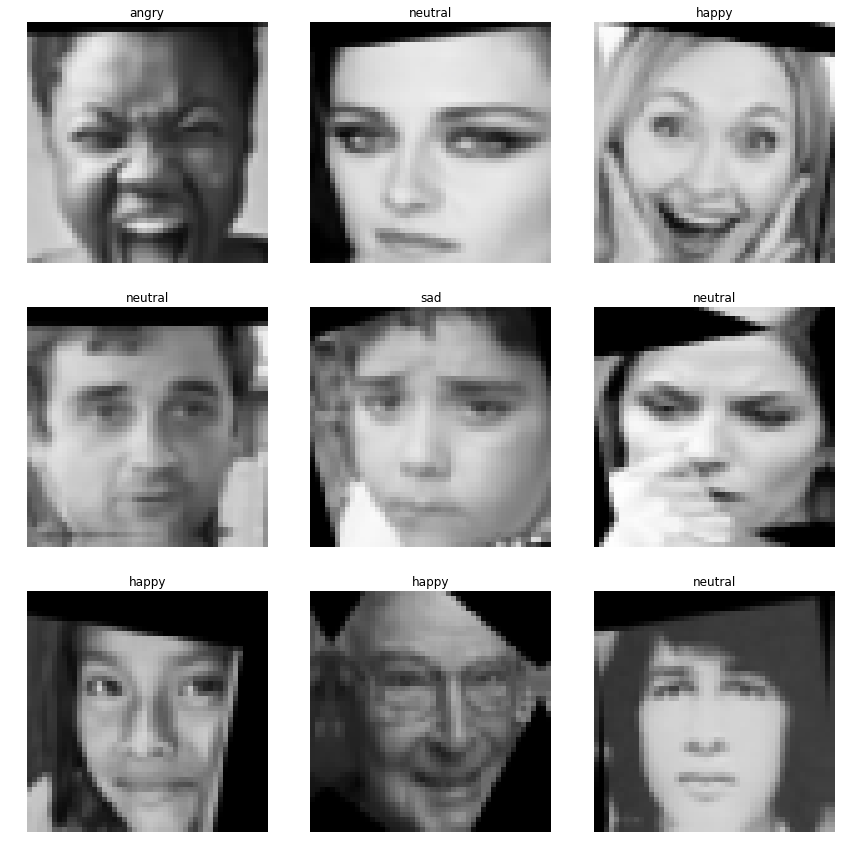

In [39]:
data.show_batch(rows=3)

In [40]:
learn = cnn_learner(data, models.resnet34)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/qnkhuat/.torch/models/resnet34-333f7ec4.pth
87306240it [00:05, 16888688.86it/s]


In [44]:
learn.model_dir = '/home/qnkhuat/AI/vision/emotion_retrain/models'

In [45]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


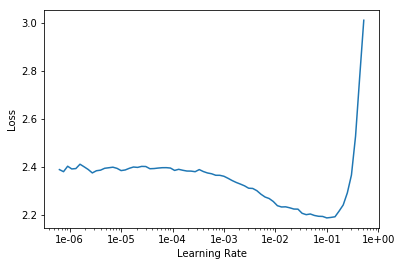

In [43]:
learn.recorder.plot()

In [46]:
learn.metrics = [accuracy]

In [47]:
learn.fit(3,lr=1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.100477,1.075237,0.628432,00:35
1,1.009924,1.011107,0.631019,00:35
2,0.948966,0.868824,0.693259,00:35


In [48]:
learn.fit_one_cycle(3,)

epoch,train_loss,valid_loss,accuracy,time
0,0.863354,0.781227,0.719276,00:35
1,0.873605,0.776634,0.720425,00:35
2,0.824357,0.759088,0.730344,00:35


In [49]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.846366,0.762641,0.726750,00:35
1,0.858242,0.746433,0.733506,00:35
2,0.836287,0.747664,0.733362,00:35


In [50]:
learn.fit(3,lr=10e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.932039,0.848168,0.701883,00:35
1,0.922053,0.869304,0.684347,00:35
2,0.915336,0.798192,0.717551,00:35


In [51]:
learn.fit(3,lr=10e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.921563,0.911444,0.670548,00:35
1,0.915144,0.833112,0.698146,00:35
2,0.862954,0.808127,0.707058,00:35


In [52]:
learn.fit(5,lr=10e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.868444,0.776364,0.725025,00:35
1,0.862706,0.781979,0.718701,00:35
2,0.858385,0.821501,0.711801,00:35
3,0.854718,0.908456,0.707201,00:35
4,0.858708,0.782772,0.724738,00:35


In [53]:
learn.fit(5,lr=10e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.891904,0.773467,0.728331,00:35
1,0.845637,0.803169,0.716545,00:35
2,0.859556,0.764654,0.730056,00:35
3,0.874498,0.824692,0.703320,00:35
4,0.829631,0.893794,0.702602,00:35
